<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/02.01-Mineracao-de-Dados-Classificacao.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Tarefas de Mineração de Dados: Classificação

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

Adaptado de: [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) 


# O problema da classificação de dados

O aprendizado de máquina é frequentemente categorizado como um subcampo da inteligência artificial, contudo na aplicação de métodos de aprendizado de máquina pela ciência de dados, é mais útil pensar no aprendizado de máquina como um meio de *construir modelos de dados*.

A "aprendizagem" entra em cena quando damos a esses modelos *parâmetros ajustáveis* ​​que podem ser adaptados aos dados observados; desta forma, pode-se considerar que o programa está "aprendendo" com os dados. 

Uma vez que esses modelos tenham sido ajustados aos dados vistos anteriormente, eles podem ser usados ​​para prever e compreender aspectos de novos dados observados. 

Compreender a definição de problemas no aprendizado de máquina é essencial para usar essas ferramentas de maneira eficaz.

### Categorias de aprendizado de máquina

O aprendizado de máquina pode ser categorizado em dois tipos principais: aprendizado supervisionado e aprendizado não supervisionado.



A **aprendizagem supervisionada** envolve de alguma forma modelar a relação entre características medidas dos dados e algum rótulo associado aos dados; uma vez determinado este modelo, ele pode ser usado para aplicar rótulos a dados novos e desconhecidos. 

Isto é subdividido em tarefas de **classificação** e tarefas de **regressão**: na classificação, os rótulos são categorias discretas, enquanto na regressão, os rótulos são quantidades contínuas.



A **aprendizagem não supervisionada** envolve modelar as características de um conjunto de dados sem referência a qualquer rótulo e é frequentemente descrita como "deixar o conjunto de dados falar por si".  Esses modelos incluem tarefas de **agrupamento** e de **redução de dimensionalidade**. 
Os algoritmos de agrupamento identificam grupos distintos de dados, enquanto os algoritmos de redução de dimensionalidade procuram representações mais sucintas dos dados. 



Além disso, existem os chamados métodos de **aprendizado semi-supervisionado**, que ficam em entre o aprendizado supervisionado e o não supervisionada. Os métodos de aprendizagem semissupervisionados costumam ser úteis quando apenas rótulos incompletos estão disponíveis.

## Classificação: predição de rótulos discretos

Primeiro daremos uma olhada em uma tarefa de classificação simples, na qual você recebe um conjunto de pontos rotulados e deseja usá-los para classificar alguns pontos não rotulados.

Imagine que temos os dados mostrados nesta figura:

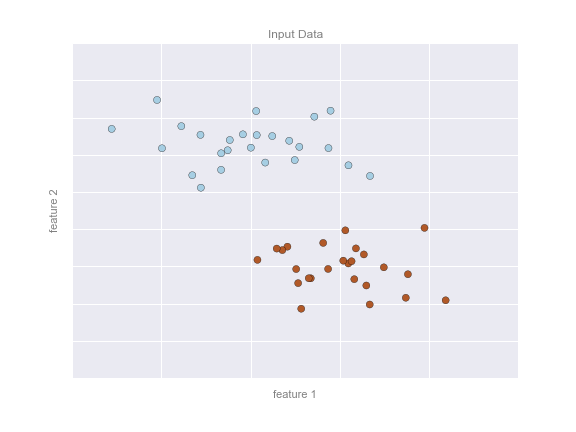

No exemplo temos dados bidimensionais: ou seja, duas *características* para cada ponto, representadas pelas posições $(x,y)$ dos pontos no plano. 
Além disso, temos um dos dois *rótulos de classe* para cada ponto, aqui representados pelas cores dos pontos. 
A partir dessas características e rótulos, gostaríamos de criar um modelo que nos permitirá decidir se um novo ponto deve ser rotulado como "azul" ou "vermelho".




Existem vários modelos possíveis para tal tarefa de classificação, mas aqui usaremos um modelo extremamente simples. Faremos a suposição de que os dois grupos podem ser separados traçando uma linha reta através do plano entre eles, de modo que os pontos de cada lado da linha caiam no mesmo grupo. 



Aqui o *modelo* é uma versão quantitativa da afirmação "uma linha reta separa as classes", enquanto os *parâmetros do modelo *são os números específicos que descrevem a localização e orientação dessa linha para os nossos dados. 
Os valores ótimo para esses parâmetros do modelo são aprendidos a partir dos dados (este é o "aprendizado" no aprendizado de máquina), o que geralmente é chamado de *treinamento do modelo*.

A figura a seguir mostra uma representação visual de um modelo treinado com esses dados.

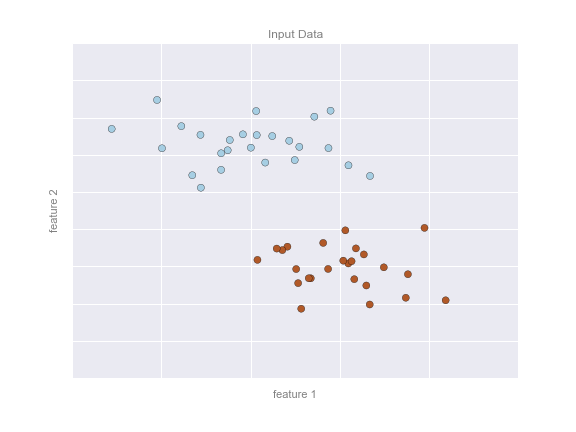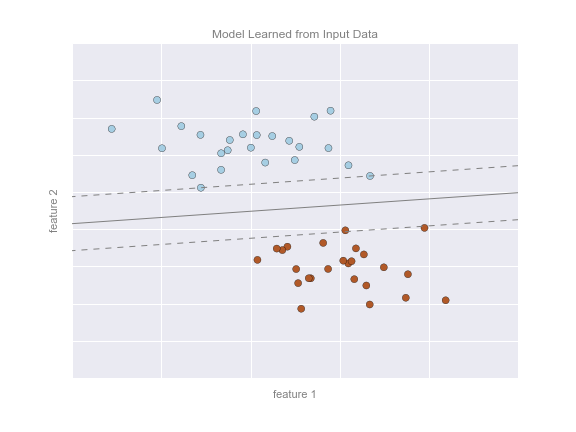

Agora que este modelo foi treinado, ele pode ser generalizado para dados novos e não rotulados. 
Podemos pegar num novo conjunto de dados, desenhar esta linha de modelo através dele e atribuir rótulos aos novos pontos com base neste modelo. 
Esta fase é geralmente chamada de *previsão*.

Esta é a ideia básica de uma tarefa de classificação em aprendizado de máquina, onde "classificação" indica que os dados possuem rótulos de classe discretos. 

À primeira vista isto pode parecer bastante trivial: seria relativamente fácil simplesmente olhar para estes dados e traçar uma linha discriminatória para realizar esta classificação. 



Um benefício da abordagem de aprendizado de máquina, entretanto, é que ela pode generalizar para conjuntos de dados muito maiores em muito mais dimensões.

Por exemplo, isso é semelhante à tarefa de detecção automatizada de spam para e-mail; neste caso, podemos usar as seguintes características e rótulos:

- *feature 1*, *feature 2*, etc. $\to$ contagens normalizadas de palavras ou frases importantes ("dinheiro", "príncipe nigeriano", etc.)
- *rótulo* $\to$ "spam" ou "not spam"



Para o conjunto de treinamento, esses rótulos podem ser determinados pela inspeção individual de uma pequena amostra representativa de e-mails; para os emails restantes, o rótulo seria determinado usando o modelo. 
Para um algoritmo de classificação adequadamente treinado com recursos bem construídos (normalmente milhares ou milhões de palavras ou frases), esse tipo de abordagem pode ser muito eficaz.

Alguns dos algoritmos de classificação mais importantes são Gaussian Naive Bayes (GNB), Support Vector Machines (SVM), e Random Forest (RF).

## Naive Bayes (NB)


Os modelos Naive Bayes são um grupo de algoritmos de classificação extremamente rápidos e simples que geralmente são adequados para conjuntos de dados de dimensões muito altas. Por serem tão rápidos e terem poucos parâmetros ajustáveis, eles acabam sendo muito úteis como uma *baseline* rápido para um problema de classificação. 

Os classificadores Naive Bayes são construídos com base em métodos de classificação bayesiana. 
Estes baseiam-se no **teorema de Bayes**, que é uma equação que descreve a relação de probabilidades condicionais de quantidades estatísticas. 



Na classificação Bayesiana, estamos interessados ​​em encontrar a probabilidade de um rótulo dadas algumas características observadas, que podemos escrever como $P(L~|~{\rm features})$. 
O teorema de Bayes nos diz como expressar isso em termos de quantidades que podemos calcular mais diretamente:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

Se estamos tentando decidir entre dois rótulos, $L_1$ e $L_2$, então uma maneira de tomar essa decisão é calcular a razão das probabilidades posteriores para cada rótulo:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$



In [97]:
import pandas as pd

data = {'condicoes':['chuva','noite','dia','dia','noite','chuva','chuva','noite','dia','dia'],
        'estrada':['ruim','boa','ruim','otima','otima','boa','otima','ruim','otima','ruim'],
        'transito':['pesado','normal','leve','leve','normal','leve','normal','pesado','pesado','pesado'],
        'defeito':['não','sim','não','sim','não','não','não','não','sim','sim'],
        'acidente':['sim','sim','não','sim','não','não','não','sim','não','sim']}

dfX = pd.DataFrame(data)[:8]
dfX

,condicoes,estrada,transito,defeito,acidente
0,chuva,ruim,pesado,não,sim
1,noite,boa,normal,sim,sim
2,dia,ruim,leve,não,não
3,dia,otima,leve,sim,sim
4,noite,otima,normal,não,não
5,chuva,boa,leve,não,não
6,chuva,otima,normal,não,não
7,noite,ruim,pesado,não,sim


Tudo o que precisamos agora é de algum modelo pelo qual possamos calcular $P({\rm features}~|~L_i)$ para cada rótulo. 
Tal modelo é chamado de *modelo generativo* porque especifica o processo aleatório hipotético que gera os dados. 

Especificar este modelo generativo para cada rótulo é a parte principal do treinamento de tal classificador Bayesiano. 



A versão geral de tal etapa de treinamento é uma tarefa muito difícil, mas podemos simplificá-la através do uso de algumas suposições simplificadoras sobre a forma deste modelo.


É aqui que entra o termo "naive" (ingênuo) em "Naive Bayes": se fizermos suposições sobre o modelo generativo para cada rótulo, poderemos encontrar uma aproximação para cada classe e então prosseguir com a classificação Bayesiana. 

Diferentes tipos de classificadores Bayes ingênuos baseiam-se em diferentes suposições ingênuas sobre os dados.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Talvez o classificador mais fácil de entender seja o Gaussian Naive Bayes. Neste classificador, a suposição é que os dados de cada rótulo são extraídos de uma distribuição gaussiana simples. 
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})}$$
onde $\mu$ é a média e $\sigma$ o desvio padrão.

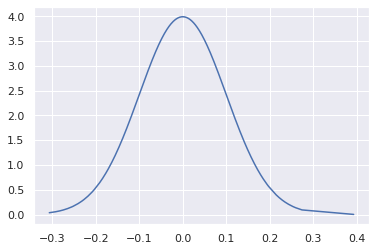

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # média e desvio padrão

x = np.sort(np.random.normal(mu, sigma, 1000))
y = 1/(sigma * np.sqrt(2 * np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(x, y)
plt.show()


Imagine que temos os seguintes dados:

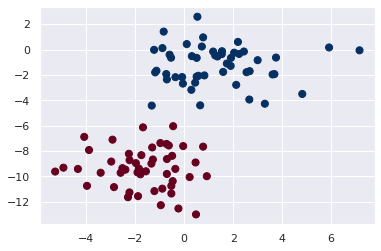

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Uma maneira extremamente rápida de criar um modelo simples é assumir que os dados são descritos por uma distribuição gaussiana sem covariância entre dimensões. Este modelo pode ser ajustado simplesmente encontrando a média e o desvio padrão dos pontos dentro de cada rótulo, que é tudo o que você precisa para definir tal distribuição. 

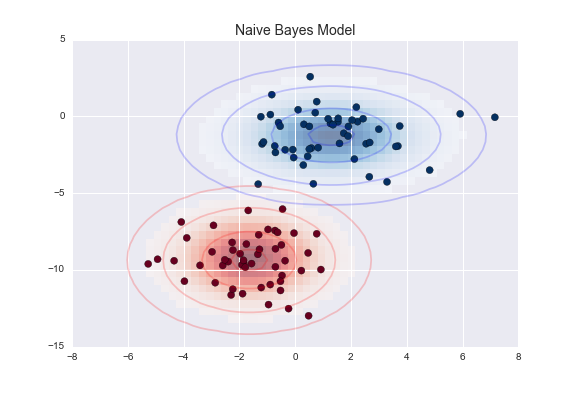

As elipses aqui representam o modelo generativo gaussiano para cada rótulo, com maior probabilidade em direção ao centro das elipses. 

Com este modelo generativo implementado para cada classe, temos uma receita simples para calcular a probabilidade $P({\rm features}~|~L_1)$ para qualquer ponto de dados e, assim, podemos calcular rapidamente a razão posterior e determinar qual rótulo é o mais provável para um determinado ponto.

Este procedimento é implementado em ``sklearn.naive_bayes.GaussianNB``:

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Agora vamos gerar alguns novos dados e prever o rótulo:

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Agora podemos representar graficamente esses novos dados para ter uma ideia de ocorre o processo de decisão:

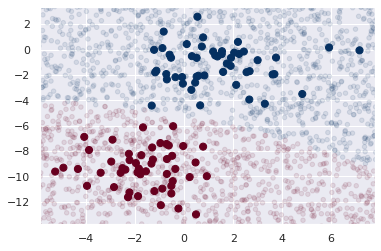

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Uma boa coisa desse formalismo bayesiano é que ele permite extrair naturalmente uma classificação probabilística, que podemos calcular usando o método ``predict_proba``:

In [14]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

As colunas fornecem as probabilidades posteriores do primeiro e do segundo rótulos, respectivamente. 

A classificação final é tão boa quanto as suposições do modelo que levam a ela, e é por isso que o Gaussian Naive Bayes muitas vezes não produz resultados muito bons.  Ainda assim, em muitos casos - especialmente à medida que o número de características se torna grande - esta suposição não é prejudicial o suficiente para impedir que ele seja um método útil.

### Quando usar Naive Bayes 
Como os classificadores Bayesianos ingênuos fazem suposições tão rigorosas sobre os dados, eles geralmente não terão um desempenho tão bom quanto um modelo mais complicado. 




Dito isto, eles têm várias vantagens:

- Eles são extremamente rápidos tanto para treinamento quanto para previsão
- Eles fornecem previsão probabilística direta
- Muitas vezes são facilmente interpretáveis
- Eles têm muito poucos (se houver) parâmetros ajustáveis
- Essas vantagens significam que um classificador Bayesiano ingênuo costuma ser uma boa escolha como classificação de linha de base inicial. Se funcionar adequadamente, você tem um classificador muito rápido e interpretável para o seu problema. Se não funcionar bem, você poderá começar a explorar modelos mais sofisticados, com algum conhecimento básico de quão bem eles devem funcionar.


Os classificadores Bayesianos ingênuos tendem a ter um desempenho especialmente bom em uma das seguintes situações:

- Quando as suposições ingênuas realmente correspondem aos dados (muito raro na prática)
- Para categorias muito bem separadas, quando a complexidade do modelo é menos importante
- Para dados de dimensões muito altas, quando a complexidade do modelo é menos importante

Os dois últimos pontos parecem distintos, mas na verdade estão relacionados: à medida que a dimensão de um conjunto de dados cresce, é muito menos provável que quaisquer dois pontos sejam encontrados próximos (afinal, eles devem estar próximos em todas as dimensões para serem próximos no geral). Isto significa que os clusters em dimensões altas tendem a ser mais separados, em média, do que os clusters em dimensões baixas, assumindo que as novas dimensões realmente acrescentam informação. 

Classificadores simplistas como o Naive Bayes tendem a funcionar tão bem ou melhor que classificadores mais complicados à medida que a dimensionalidade aumenta: uma vez que você tenha dados suficientes, até mesmo um modelo simples pode ser muito poderoso.

## K-Nearest Neighbor (kNN)

## Support Vector Machines (SVM) 


## Random Forest (RF)

In [87]:
df

,condicoes,estrada,transito,defeito,acidente
0,chuva,ruim,pesado,sim,sim
1,noite,boa,normal,não,sim
2,dia,ruim,leve,sim,não
3,dia,otima,leve,não,sim
4,noite,otima,normal,sim,não
5,chuva,boa,leve,sim,não
6,chuva,otima,normal,sim,não
7,noite,ruim,pesado,sim,sim
8,dia,otima,pesado,não,não
9,dia,ruim,pesado,não,sim


In [89]:
# for x in dfX:
#     print(dfX[x].value_counts())
    
for x in dfX:
    print(dfX[x][dfX.acidente == 'não'].value_counts())


chuva    2
dia      1
noite    1
Name: condicoes, dtype: int64
otima    2
ruim     1
boa      1
Name: estrada, dtype: int64
leve      2
normal    2
Name: transito, dtype: int64
não    4
Name: defeito, dtype: int64
não    4
Name: acidente, dtype: int64
